In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("UDR_Assist1.csv")
data.head()

,Phone Number,Domain Name,Bytes Upload,Bytes Download
0,987-7775,www.quora.com,27279.212307,42983.398196
1,987-7775,www.snapchat.com,28701.826983,38074.010180
2,987-7775,www.tiktok.com,59398.304729,64384.944793
3,987-7775,www.linkedin.com,30180.686382,30552.896278
4,987-7775,www.whatsapp.com,30443.362298,30787.390863


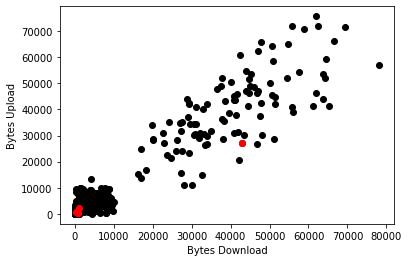

In [11]:
X = data[["Bytes Upload","Bytes Download"]]
#Visualise data points
plt.scatter(X["Bytes Download"],X["Bytes Upload"],c='black')
plt.xlabel('Bytes Download')
plt.ylabel('Bytes Upload')
K = 5
Centroids = (X.sample(n=K))
plt.scatter(Centroids["Bytes Download"],Centroids["Bytes Upload"],c='red')
plt.show()

In [13]:

# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Bytes Download"]-row_d["Bytes Download"])**2
            d2=(row_c["Bytes Upload"]-row_d["Bytes Upload"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Bytes Upload","Bytes Download"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Bytes Upload'] - Centroids['Bytes Upload']).sum() + (Centroids_new['Bytes Download'] - Centroids['Bytes Download']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Bytes Upload","Bytes Download"]]

/var/folders/5q/p6c2ncb9653352p3lj330mf00000gp/T/ipykernel_45131/2647020511.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


6955.0605913985955
5919.7828171973415
5966.891730962712
6538.194143699524
18037.91367234637
19077.237981540733
11429.631487360395
6539.76294953471
3504.8288867599003
1571.8797054531776
3637.6700094422795
2172.296567617419
1367.4699462984531
415.7763378559739
180.41739958261178
137.3616655552837
64.04930978783341
0.0


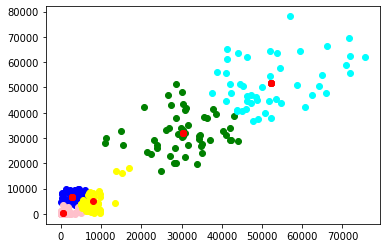

In [14]:
color=['blue','green','cyan','pink','yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Bytes Upload"],data["Bytes Download"],c=color[k])
    plt.scatter(Centroids["Bytes Upload"],Centroids["Bytes Download"],c='red')
    